# Analysing the Stroop Effect

## Introduction

The aim of this project was to investigate a classic phenomenon from experimental psychology called the Stroop Effect.  The Stroop Effect is a demonstration of interference in the reaction time of a task.  The Stroop task investigated for this project was a list of congruent and incongruent coloured words.  The congruent words were colour words whose names matched the colors in which they were printed (eg. the word 'blue' is printed in blue ink).  The incongruent words were colour words whose names did not match the colors in which they were printed (eg. the word 'blue' is printed in red ink). 

For the purpose of this project, a data set was provided, containing the reaction times of 24 paricipants, to name the congruent and incongruent words outloud.  The aim of this project was to identify if, on average, indivduals have a longer reaction time to name the colours of incongruent words compared to congruent words.

## Methods

The aim was to investigate if, on average, indivduals have a longer reaction time to name the colours of the incongruent words compared to congruent words.  However, we are dealing with a small sample set of just 24 data points for each test, and any diffreence observed between the reaction times from this dataset could just be by random chance.  Therefore, we would like to determine the liklihood of observing a difference in the mean reaction times for the population at large.  To do this, we can perform a hypothesis test to assess whether the sample means (x_bar) are different because the two population means (µ) are different, or just by chance. The hypothesis for this task is as follows:

The null hypothesis: There is no difference between the average reaction time of naming the colours of the congruent words and the incongrunet words. 

The alternative hypothesis: There is a difference between the average reaction time of naming the colours of the congruent words and the incongrunet words. 

In summary:  Ho: µ_diff = 0   and  HA: µdiff is not equal to 0  (where µdiff is the difference in the mean reaction times of naming the colours for the congruent and incongruent words). 

In order to test if the null hypothesis is true, a paired t-test can be implemented. In this case a t-test is preferred over a z-test, due to the fact that the sample size is small (24 individuals) and a t-test addresses the uncertainty of the standard error estimate for small sample sizes.  The t-test is considered quite robust to violations of the normal distribution.  This means that, without knowing the population paramters, we can assume a normal population distribution, without serious error being introduced into the test.  Importantly, the reaction time results between the two tests are not independent of each other.  The reaction speed of one individual in the congruent test is likely not independent of their reaction speed in the incongruent test eg. if a person is good at such tests, they are likely to have relatively quick reaction times for both the congruent and incongruent words.  Therefore, these data sets are said to be paired.  Thus, a paired t-test will be performed in order to asses the hypothesis.

Bootstrapping is another method which can be implemented here to test if the null hypothesis is true.  Bootstrapping is a simulation based method, which takes samples from the original sample, with replacement.  Sample statistics can be derived from the bootstrap samples, and can be replicated multiple times to build-up a sampling distribution which gives us an idea of what the population sampling distribution would look like if we had access to it.  In this case, we are dealing with a very small sample size of 24, which makes it difficult to assume normality.  Therefore, bootstrap simulations allow us a build up a sampling distribution, rather than just assuming normality, from which we can measure confidence intervals and determine p-values to test the validity of the null hypothesis.

## Descriptive Statistics

In [4]:
import pandas as pd
data = pd.read_csv('stroopdata.csv')
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


From the descriptive statistics table, the measures of centre of the data are provided by the mean and median (the 50th percentile) values.  These data give an indication of how the reaction times between the two data sets differ.  The mean of the congruent data set is lower than the mean of the incongruent data set (14.05 vs. 22.02. respectively), which suggests that, on average, the incongruent test takes a longer time to complete than the congruent test.  The standard deviation (std) value provides an insight into the variability in the 2 data sets.  The standard deviation is higher for the incongruent reaction times (4.80) than the congruent reaction times (3.56). This suggests that the individual results for the incongruent data are more varied.  However, further exploratory data analysis and statistical analysis is required to gain better insights from these descriptive statistics.

## Data Visualisation

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('stroopdata.csv')

_ = data.boxplot()
_ = plt.ylabel('reaction time (s)')
plt.show()
_ = plt.hist(data['Congruent'], bins = 24)
_ = plt.xlabel('reaction times')
_ = plt.ylabel('counts')
_ = plt.title('Congruent Test')
_ = plt.xlim(5, 40)
plt.show()
_ = plt.hist(data['Incongruent'], bins=24)
_ = plt.xlabel('reaction times')
_ = plt.ylabel('counts')
_ = plt.title('Incongruent Test')
_ = plt.xlim(5, 40)
plt.show()

The boxplot clearly shows the difference in the interquartile range (IQR) of the congruent test reaction times comared to the incongruent test reaction times i.e. the middle 50% of the congruent test reaction times are lower than the middle 50% of the incongruent test reaction times.  In the case of the boxplot for the incongruent data, two data points are visible at approximately 35 seconds, which is more than 2 IQR away from the median (2 * 5.33 + 21.02 = 31.68) and therefore, these points can be denoted as outliers.   These outliers will increase the mean of the incongruent data and thus result in a right-skewed distribution of the reaction times, as illustrated in the histogram.  Although, outliers are not present in the congruent data boxplot, the distribution of reaction times is also right-skewed, as shown in the histogram of the data set.

## Statistical Tests

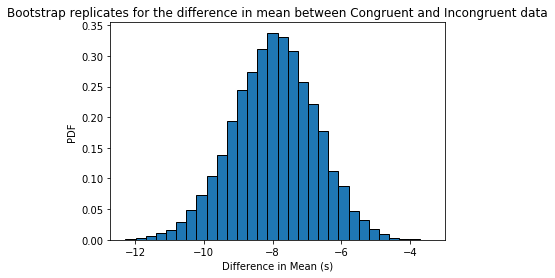

Difference in observed mean = -7.964791666666667 s
95% Confidence Interaval from bs_reps = [-10.35540104  -5.63826771] s


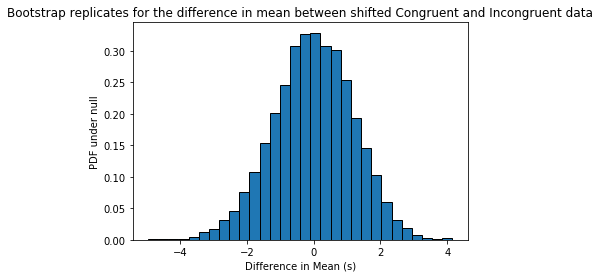

p-value bs_rep =  0.0
Difference in bs_replicates mean = -0.009453941666666443
Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)


In [8]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#set random number generator for reproducibility
np.random.seed(123456789)

#load data and get arrays of both data sets
data = pd.read_csv('stroopdata.csv')
con = np.array(data['Congruent'])
incon = np.array(data['Incongruent'])

#Define bootsrap replicate function
def bootstrap_replicate(data, func):
    '''Generate bootstrap replicate of 1D data'''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

#Define multiple bootsrap replicates function
def draw_bs_reps(data, func, size=1):
    '''draw bootstrap replicates'''
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate(data, func)
    return bs_replicates

# GENERATE BOOTSTRAP REPLICATES FOR CONFIDENCE INTERVALS
# 1) Prepare data - flatten con and incon to 1D arrays
diff_obs = np.mean(con) - np.mean(incon)
con_1D = con.flatten()
incon_1D = incon.flatten()

# 2) compute bs_replicates for confidence interval
bs_replicates_con = draw_bs_reps(con_1D, np.mean, size=10000)
bs_replicates_incon = draw_bs_reps(incon_1D, np.mean, size=10000)
bs_replicates_diff_mean = bs_replicates_con - bs_replicates_incon
conf_int = np.percentile(bs_replicates_diff_mean, [2.5, 97.5])

# 3) plot the difference in mean from bs_replicates 
_=plt.hist(bs_replicates_diff_mean, bins=30, normed=True, edgecolor = 'black')
_=plt.title('Bootstrap replicates for the difference in mean between Congruent and Incongruent data')
_=plt.xlabel('Difference in Mean (s)')
_=plt.ylabel('PDF')
plt.show()

# 4) print diff mean & confidence intervals
print('Difference in observed mean =', diff_obs, 's')
print('95% Confidence Interaval from bs_reps =', conf_int, 's')

# GENERATE BOOTSTRAP RELICATES FOR p-VALUES
# 1) Concatenate data for bootstrap samples
data_concat = np.concatenate((con, incon))
concat_mean = np.mean(data_concat)

# 2) shift arrays & flatten shifted arrays to 1D 
con_shift = con - np.mean(con) + concat_mean
incon_shift = incon - np.mean(incon) + concat_mean
con_shift_1D = con_shift.flatten()
incon_shift_1D = incon_shift.flatten()

# 3) compute multiple bs_replicates of shifted arrays
bs_replicates_con_shift = draw_bs_reps(con_shift_1D, np.mean, size=10000)
bs_replicates_incon_shift = draw_bs_reps(incon_shift_1D, np.mean, size=10000)

# 4) get difference of means of replicates
bs_replicates_diff_mean_shift = bs_replicates_con_shift - bs_replicates_incon_shift

# 4) plot the difference of means of bs_replicates for null hypothesis
_=plt.hist(bs_replicates_diff_mean_shift, bins=30, normed=True, edgecolor = 'black')
_=plt.title('Bootstrap replicates for the difference in mean between shifted Congruent and Incongruent data')
_=plt.xlabel('Difference in Mean (s)')
_=plt.ylabel('PDF under null')
plt.show()

# 5) compute p-value: p_bs
p_bs = np.sum(bs_replicates_diff_mean_shift <= diff_obs) / len(bs_replicates_diff_mean_shift)

# 6) print p-value and average bootstrap diff in mean
print('p-value bs_rep = ', p_bs)
print('Difference in bs_replicates mean =', np.sum(bs_replicates_diff_mean_shift) / len(bs_replicates_diff_mean_shift))

# METHOD 2: Use t-test on data set to find p-values 
t_test = stats.ttest_rel(con, incon)
print(t_test)

## Results & Discussion

The differnece between the average time taken to complete the congruent test and the incongruent test was -7.96 seconds.  This result was calculated from a sample size of just 24 individuals, and indicates that on average, indivduals take almost 8 seconds longer to complete the incongruent test. Due to the small sample size, the results were simulated 10000 times, using bootstrap simulations.   The 95% confidence intervals computed from the bootstrap samples show that we are 95% confident that it takes between 5.64 and 10.36 seconds longer to complete the incongruent test compared to the congruent test.   

In order to determine that this result was not obtained by random chance, a hypothesis test was carried out.  The null hypothesis states that the mean times taken to complete the congruent test and the incongruent test are equal.  In order to test this hypothesis, both datasets were shifted to have the same mean, and then 10000 bootstrap simulations were carried out on the shifted data.  The difference in mean was calulated from the boostrap replicates and the results were plotted.  As shown in the plot, the distribution of the difference in means is centred at around 0, and the average difference in mean, from the boostrap replicates, was calculated as -0.01 seconds.  
The p-value was calulated as approximately 0, which indicates that the probability of getting the observed difference of mean from the experiment (-7.96 s) is almost 0, given that the null hypothesis is true, which states that the mean difference between the time taken to complete both tests is 0. Therefore, given that the p-value is approximately 0, we can reject the null hypothesis and conclude that there is a statistically significant difference between the time taken to complete the congruent test and incongruent test, and that on average, individuals take longer to complete the inconguent test.  

As an alternative approach, a t-test was carried out on the paired data, using a t-test function from the Scipy package.  This function computed a test statistic of -8.02 and a p-value of approximately 0.  Therefore, these results are inline with the results obtained from the boostrap simulations method.


## Conclusion

Overall, these results matched with the expected results. In the congruent test the colours of the words match the spelling of the words. However, in the incongruent test, the colour of the words do not match the spelling of the words, which results in confusion of the information your brain is receiving. As a result, it is expected that the incongruent test will take a longer time to complete than the congruent test (ref: https://faculty.washington.edu/chudler/words.html#seffect).